Time Series in AutoGluon

Autogluon has the ability to create probabilistic forecasts for Time series data. It uses a variety of models that it runs, including ETS models, ARIMA based models and even neural networks.

Two main pathways that you typically see in Time series data.

There is the **single variate time series**, which is just you have a timestamp and then a single data point that you're trying to forecast into the future.

And then there are the **Multivariate Time series**, and there's really *two flavors* of this.

There's multivariate where you have what are known as *known covariance*. That is information that you know about the future, for example, known future holidays. And let's say you're trying to predict or forecast future flow to a store. Knowing about future Christmas or future Thanksgiving could be very helpful.

And then there's also a multivariate time series analysis that has *past covariance*. For example, you can have multiple past weather metrics like understanding humidity or wind direction

Single Variate Time Series Forecasting in AutoGluon

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/Retail_Sales_Beer_Wine_Liquor.csv",
                 index_col="DATE",
                 parse_dates=True)
df.head()

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


<Axes: xlabel='DATE'>

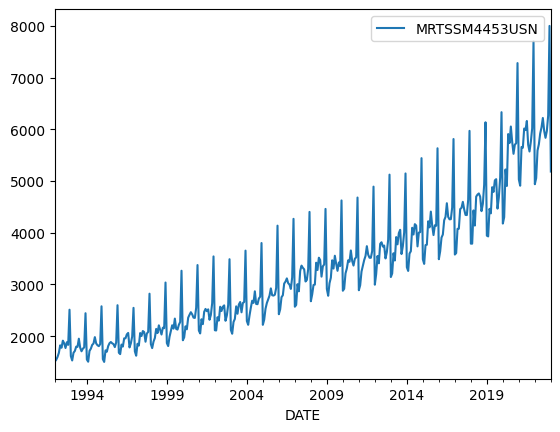

In [4]:
df.plot()

<Axes: xlabel='DATE'>

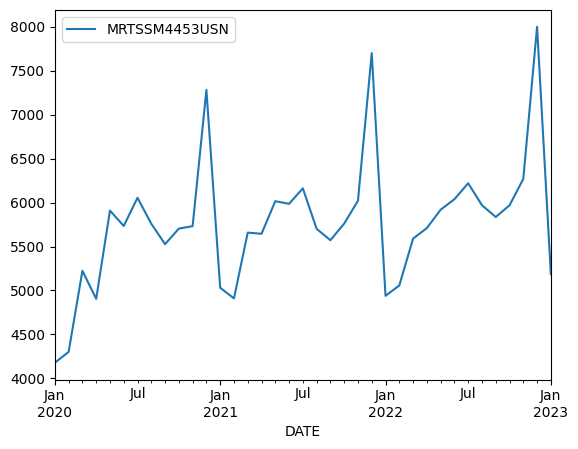

In [5]:
data = df.loc["2020-01-01":]
data.plot()

In [6]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

Get data in correct format for Autogluon

In [7]:
df = pd.read_csv("data/Retail_Sales_Beer_Wine_Liquor.csv")

In [8]:
df['timestamp'] = pd.to_datetime(df["DATE"])
df

,DATE,MRTSSM4453USN,timestamp
0,1992-01-01,1509,1992-01-01
1,1992-02-01,1541,1992-02-01
2,1992-03-01,1597,1992-03-01
3,1992-04-01,1675,1992-04-01
4,1992-05-01,1822,1992-05-01
...,...,...,...
368,2022-09-01,5836,2022-09-01
369,2022-10-01,5969,2022-10-01
370,2022-11-01,6269,2022-11-01
371,2022-12-01,8001,2022-12-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           373 non-null    object        
 1   MRTSSM4453USN  373 non-null    int64         
 2   timestamp      373 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.9+ KB


In [17]:
df = df.drop("DATE",axis=1)
df

,timestamp,target
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
368,2022-09-01,5836
369,2022-10-01,5969
370,2022-11-01,6269
371,2022-12-01,8001


In [13]:
df['target'] = df["MRTSSM4453USN"]

In [16]:
df = df.drop("MRTSSM4453USN", axis=1)
df

,DATE,timestamp,target
0,1992-01-01,1992-01-01,1509
1,1992-02-01,1992-02-01,1541
2,1992-03-01,1992-03-01,1597
3,1992-04-01,1992-04-01,1675
4,1992-05-01,1992-05-01,1822
...,...,...,...
368,2022-09-01,2022-09-01,5836
369,2022-10-01,2022-10-01,5969
370,2022-11-01,2022-11-01,6269
371,2022-12-01,2022-12-01,8001


In [18]:
df.head()

,timestamp,target
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [19]:
df["item_id"] = "Sales"
df

,timestamp,target,item_id
0,1992-01-01,1509,Sales
1,1992-02-01,1541,Sales
2,1992-03-01,1597,Sales
3,1992-04-01,1675,Sales
4,1992-05-01,1822,Sales
...,...,...,...
368,2022-09-01,5836,Sales
369,2022-10-01,5969,Sales
370,2022-11-01,6269,Sales
371,2022-12-01,8001,Sales


In [22]:
df.to_csv("formatted_retail.csv", index=False)

In [21]:
# TimeSeriesDataFrame.from_data_frame(df, id_column="item_id",
#                                     timestamp_column='timestamp')

target
item_id timestamp         
Sales   1992-01-01    1509
        1992-02-01    1541
        1992-03-01    1597
        1992-04-01    1675
        1992-05-01    1822
...                    ...
        2022-09-01    5836
        2022-10-01    5969
        2022-11-01    6269
        2022-12-01    8001
        2023-01-01    5184

[373 rows x 1 columns]

In [23]:
train_data = TimeSeriesDataFrame("formatted_retail.csv")

In [24]:
train_data

target
item_id timestamp         
Sales   1992-01-01    1509
        1992-02-01    1541
        1992-03-01    1597
        1992-04-01    1675
        1992-05-01    1822
...                    ...
        2022-09-01    5836
        2022-10-01    5969
        2022-11-01    6269
        2022-12-01    8001
        2023-01-01    5184

[373 rows x 1 columns]

In [27]:
# Taking a part of dataset based on dates 
df.set_index('timestamp').loc["2020-01-01":]

,target,item_id
timestamp,,
2020-01-01,4178,Sales
2020-02-01,4301,Sales
2020-03-01,5224,Sales
2020-04-01,4905,Sales
2020-05-01,5909,Sales
2020-06-01,5734,Sales
2020-07-01,6055,Sales
2020-08-01,5759,Sales
2020-09-01,5527,Sales


In [28]:
# Taking a part of dataset based on dates for forecasting - method 1
df.set_index('timestamp').loc["2020-01-01":].reset_index()

,timestamp,target,item_id
0,2020-01-01,4178,Sales
1,2020-02-01,4301,Sales
2,2020-03-01,5224,Sales
3,2020-04-01,4905,Sales
4,2020-05-01,5909,Sales
5,2020-06-01,5734,Sales
6,2020-07-01,6055,Sales
7,2020-08-01,5759,Sales
8,2020-09-01,5527,Sales
9,2020-10-01,5704,Sales


In [30]:
# Method 2:
train_data.index

MultiIndex([('Sales', '1992-01-01'),
            ('Sales', '1992-02-01'),
            ('Sales', '1992-03-01'),
            ('Sales', '1992-04-01'),
            ('Sales', '1992-05-01'),
            ('Sales', '1992-06-01'),
            ('Sales', '1992-07-01'),
            ('Sales', '1992-08-01'),
            ('Sales', '1992-09-01'),
            ('Sales', '1992-10-01'),
            ...
            ('Sales', '2022-04-01'),
            ('Sales', '2022-05-01'),
            ('Sales', '2022-06-01'),
            ('Sales', '2022-07-01'),
            ('Sales', '2022-08-01'),
            ('Sales', '2022-09-01'),
            ('Sales', '2022-10-01'),
            ('Sales', '2022-11-01'),
            ('Sales', '2022-12-01'),
            ('Sales', '2023-01-01')],
           names=['item_id', 'timestamp'], length=373)

In [31]:
train_data.index.get_level_values(1)

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='timestamp', length=373, freq=None)

In [33]:
train_data = train_data.loc[train_data.index.get_level_values(1) >= "2020-01-01"]

In [34]:
train_data

target
item_id timestamp         
Sales   2020-01-01    4178
        2020-02-01    4301
        2020-03-01    5224
        2020-04-01    4905
        2020-05-01    5909
        2020-06-01    5734
        2020-07-01    6055
        2020-08-01    5759
        2020-09-01    5527
        2020-10-01    5704
        2020-11-01    5732
        2020-12-01    7282
        2021-01-01    5031
        2021-02-01    4910
        2021-03-01    5658
        2021-04-01    5645
        2021-05-01    6016
        2021-06-01    5986
        2021-07-01    6162
        2021-08-01    5701
        2021-09-01    5572
        2021-10-01    5761
        2021-11-01    6021
        2021-12-01    7701
        2022-01-01    4939
        2022-02-01    5057
        2022-03-01    5590
        2022-04-01    5710
        2022-05-01    5919
        2022-06-01    6038
        2022-07-01    6220
        2022-08-01    5970
        2022-09-01    5836
        2022-10-01    5969
        2022-11-01    6269
        2022-12-01    8001
        2023-01-01    5184

Train model and forecast

In [35]:
# Predicting for 6 Months... note 6 is how many rows in the future we are trying to predict. Here it means month as dataset is in months
predictor = TimeSeriesPredictor(prediction_length=6, 
                                path="mytimeseriesmodel",
                                presets="medium_quality",
                                time_limit=600,
                                target="target",
                                eval_metric='sMAPE')

In [36]:
predictor.fit(train_data)

c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\autogluon\timeseries\predictor.py:236: UserWarning: Detected frequency 'MS' is not supported by TimeSeriesPredictor. This may lead to some models not working as intended. Please convert the timestamps to one of the supported frequencies: {'D', 'M', 'min', 'Y', 'T', 'W', 'S', 'A', 'H', 'Q'}. See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases for details.
  warnings.warn(
================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 6,
 'random_seed': None,
 'target': 'target',
 'time_limit': None}
Provided training data set with 37 rows, 1 items (item = single time series). Average time series length is 37.0.
Training artifacts will be sav

In [37]:
predictions = predictor.predict(train_data)

Global seed set to 123
c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\autogluon\timeseries\predictor.py:236: UserWarning: Detected frequency 'MS' is not supported by TimeSeriesPredictor. This may lead to some models not working as intended. Please convert the timestamps to one of the supported frequencies: {'D', 'M', 'min', 'Y', 'T', 'W', 'S', 'A', 'H', 'Q'}. See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases for details.
  warnings.warn(
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [38]:
predictions

mean          0.1          0.2          0.3  \
item_id timestamp                                                        
Sales   2023-02-01  5192.134184  5032.876633  5088.129712  5126.910450   
        2023-03-01  5819.548485  5650.654017  5709.215252  5750.381403   
        2023-04-01  5862.990538  5688.974498  5749.293863  5791.727462   
        2023-05-01  6118.132666  5939.978617  6001.718476  6045.176351   
        2023-06-01  6168.021600  5986.246277  6049.229244  6093.583489   
        2023-07-01  6294.673852  6109.628714  6173.734142  6218.897759   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
Sales   2023-02-01  5160.682024  5191.703634  5223.836850  5257.047876   
        2023-03-01  5786.191224  5819.117935  5853.156252  5888.405525   
        2023-04-01  5828.621093  5862.560276  5897.610778  5933.942996   
        2023-05-01  6082.945187  6117.702404  6153.570940  6190.778364   
        2023-06-01  6132.118239  6167.591338  6204.175755  6242.149094   
        2023-07-01  6258.124088  6294.243590  6331.474410  6370.139328   

                            0.8          0.9  
item_id timestamp                             
Sales   2023-02-01  5296.466817  5351.294235  
        2023-03-01  5930.209879  5988.345453  
        2023-04-01  5977.015086  6036.909366  
        2023-05-01  6234.874730  6296.189504  
        2023-06-01  6287.141829  6349.699711  
        2023-07-01  6415.941436  6479.621778

In [40]:
predictor.fit_summary()

****************** Summary of fit() ******************
Estimated performance of each model:
              model  score_val  pred_time_val  fit_time_marginal  fit_order
0  WeightedEnsemble  -0.027518       8.381928           3.296108          9
1  AutoGluonTabular  -0.039725       0.059000           6.362960          7
2           AutoETS  -0.085378      24.154626           0.000997          6
3             Theta  -0.087358       6.022505           0.002001          4
4               ETS  -0.088238       6.554715           0.006006          3
5     SeasonalNaive  -0.097653       6.075212           0.001001          2
6             Naive  -0.097653       8.173593           0.003389          1
7             ARIMA  -0.101067       0.149336           0.000910          5
8            DeepAR  -0.113882       0.062508         186.956118          8
Number of models trained: 9
Types of models trained:
{'ARIMAModel', 'DeepARModel', 'TimeSeriesGreedyEnsemble', 'AutoGluonTabularModel', 'ETSModel', 

{'model_types': {'Naive': 'NaiveModel',
  'SeasonalNaive': 'SeasonalNaiveModel',
  'ETS': 'ETSModel',
  'Theta': 'ThetaModel',
  'ARIMA': 'ARIMAModel',
  'AutoETS': 'AutoETSModel',
  'AutoGluonTabular': 'AutoGluonTabularModel',
  'DeepAR': 'DeepARModel',
  'WeightedEnsemble': 'TimeSeriesGreedyEnsemble'},
 'model_performance': {'Naive': -0.0976528021476701,
  'SeasonalNaive': -0.0976528021476701,
  'ETS': -0.08823813051231584,
  'Theta': -0.0873576872339731,
  'ARIMA': -0.10106732436219316,
  'AutoETS': -0.08537751812004891,
  'AutoGluonTabular': -0.03972498317571054,
  'DeepAR': -0.1138821240864261,
  'WeightedEnsemble': -0.027517954072375752},
 'model_best': 'WeightedEnsemble',
 'model_paths': {'Naive': 'mytimeseriesmodel\\models\\Naive\\',
  'SeasonalNaive': 'mytimeseriesmodel\\models\\SeasonalNaive\\',
  'ETS': 'mytimeseriesmodel\\models\\ETS\\',
  'Theta': 'mytimeseriesmodel\\models\\Theta\\',
  'ARIMA': 'mytimeseriesmodel\\models\\ARIMA\\',
  'AutoETS': 'mytimeseriesmodel\\models\

In [ ]:
# Visualize predictions

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='timestamp'>

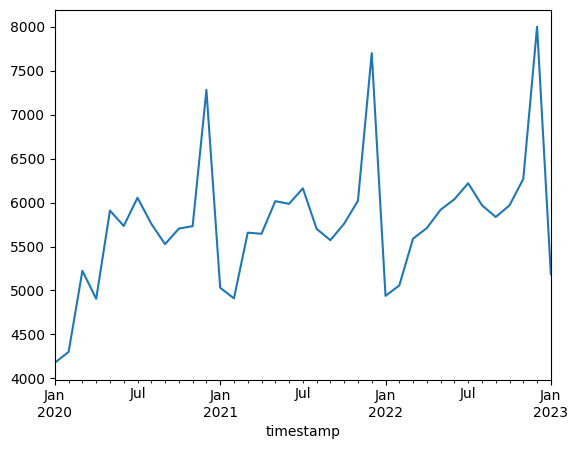

In [45]:
item_id = "Sales"
train_data.loc[item_id]["target"].plot()

In [53]:
def plot_predictions(train_data, predictions, item_id, target_col):
    plt.figure(figsize=(20,3), dpi=150)
        
    y_past = train_data.loc[item_id][target_col]
    plt.plot(y_past, label="Known Historical Values")

    # Y Pred
    y_pred = predictions.loc[item_id]
    plt.plot(y_pred['mean'], label="Mean Forecast")

    # Fill confidence intervals
    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.2, label="10%-90% Confidence Level"
    )

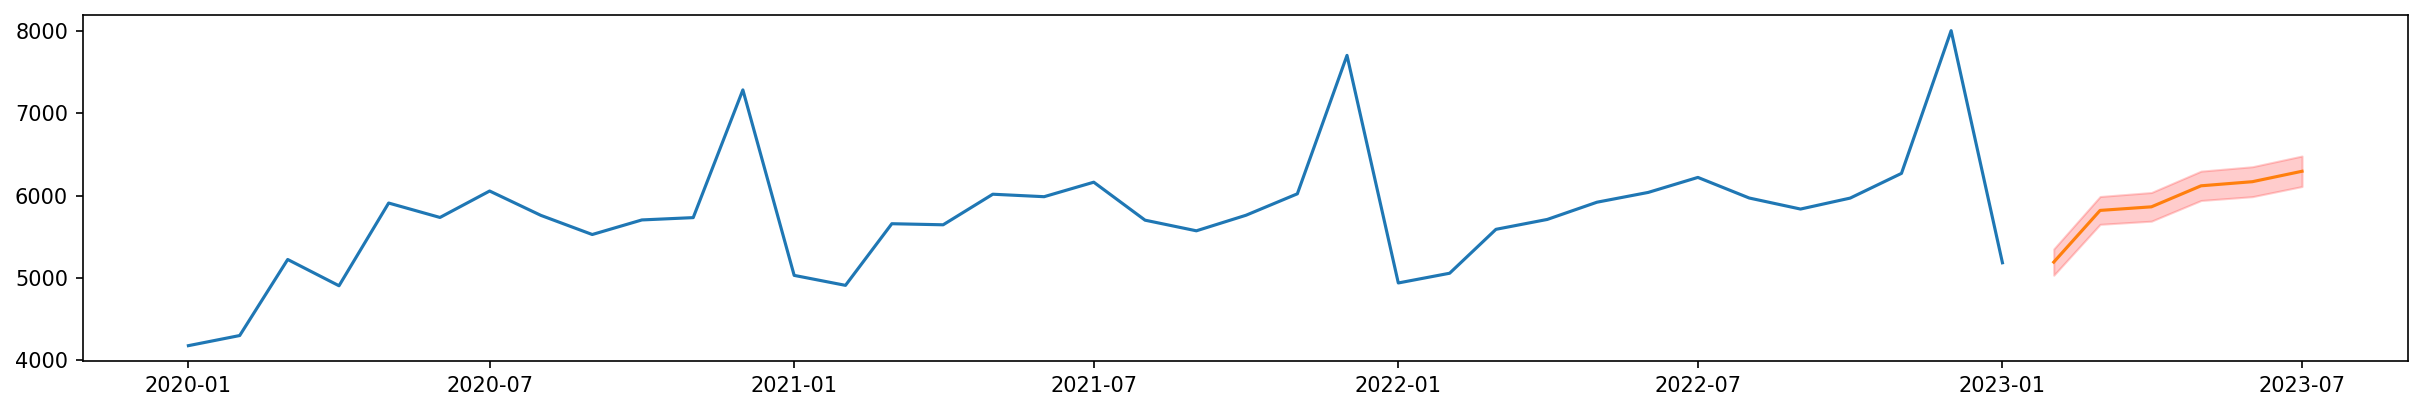

In [54]:
plot_predictions(train_data, predictions, item_id="Sales", target_col="target")